/var/folders/yd/pcgk6f7n34g2vpjjf_7ylwdw0000gq/T/ipykernel_75379/2512033992.py:8: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)
/var/folders/yd/pcgk6f7n34g2vpjjf_7ylwdw0000gq/T/ipykernel_75379/2512033992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['int_rate'] = df_cleaned['int_rate'].str.rstrip('%').astype('float') / 100.0
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
           id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
656   1051045    1282508       7600         7600       7600.00000   60 months   
3244  1018045    1246231       6000         6000       6000.00000   60 months   
6340   970313    1191970       2000         2000       2000.00000   60 months   
6873   891092    1107881      14125        14125      14125.00000   60 months   
7664   878184    1092949      25450        18600      18511.02371   60 months   

      int_rate  installment grade sub_grade  ... next_pymnt_d  \
656     0.1677       187.95     D        D2  ...       Jun-16   
3244    0.1903       155.75     E        E2  ...       Jun-16   
6340    0.1427        46.82     C        C2  ...       Jun-16   
6873    0.1427       330.65     C        C2  ...   

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


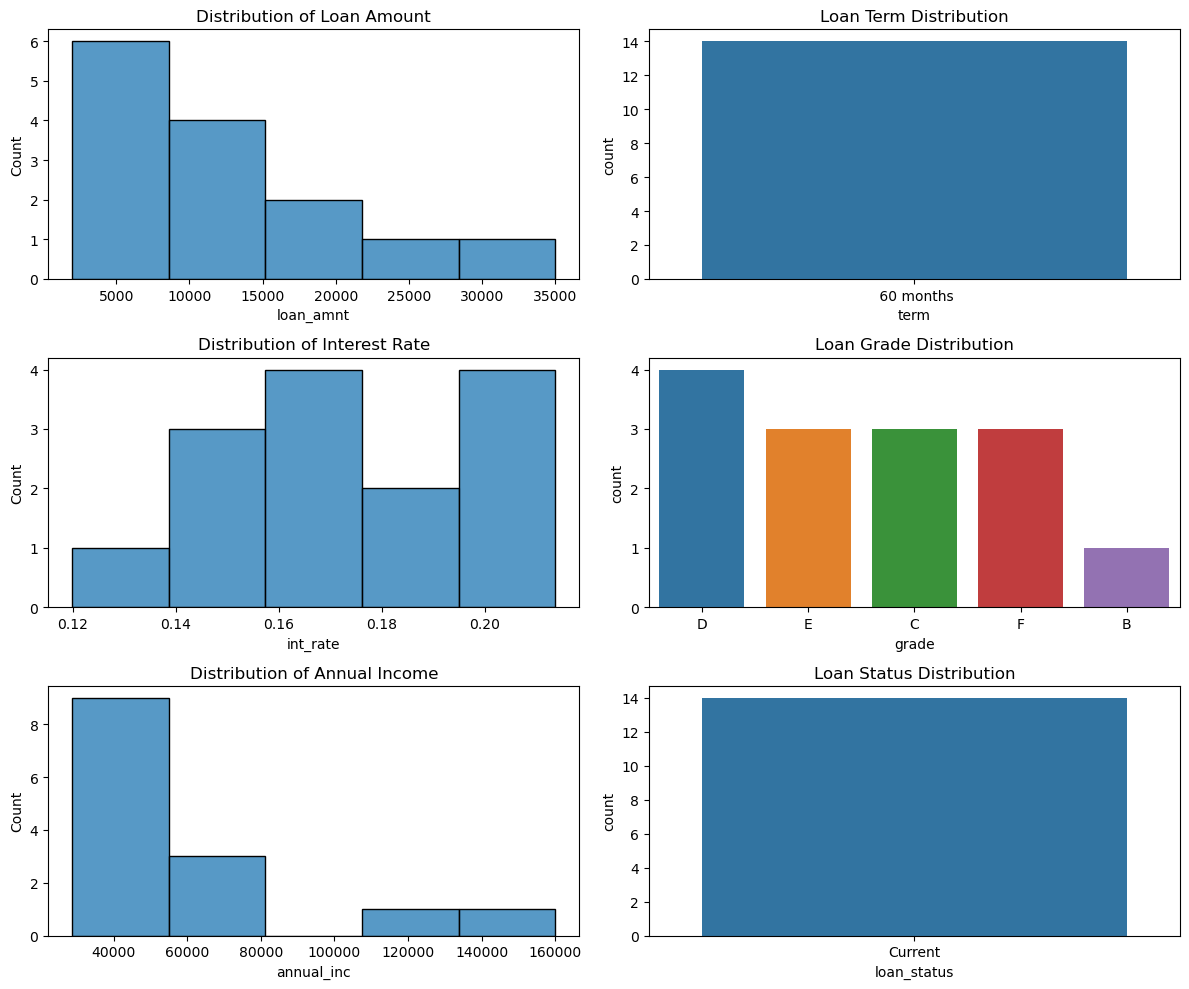

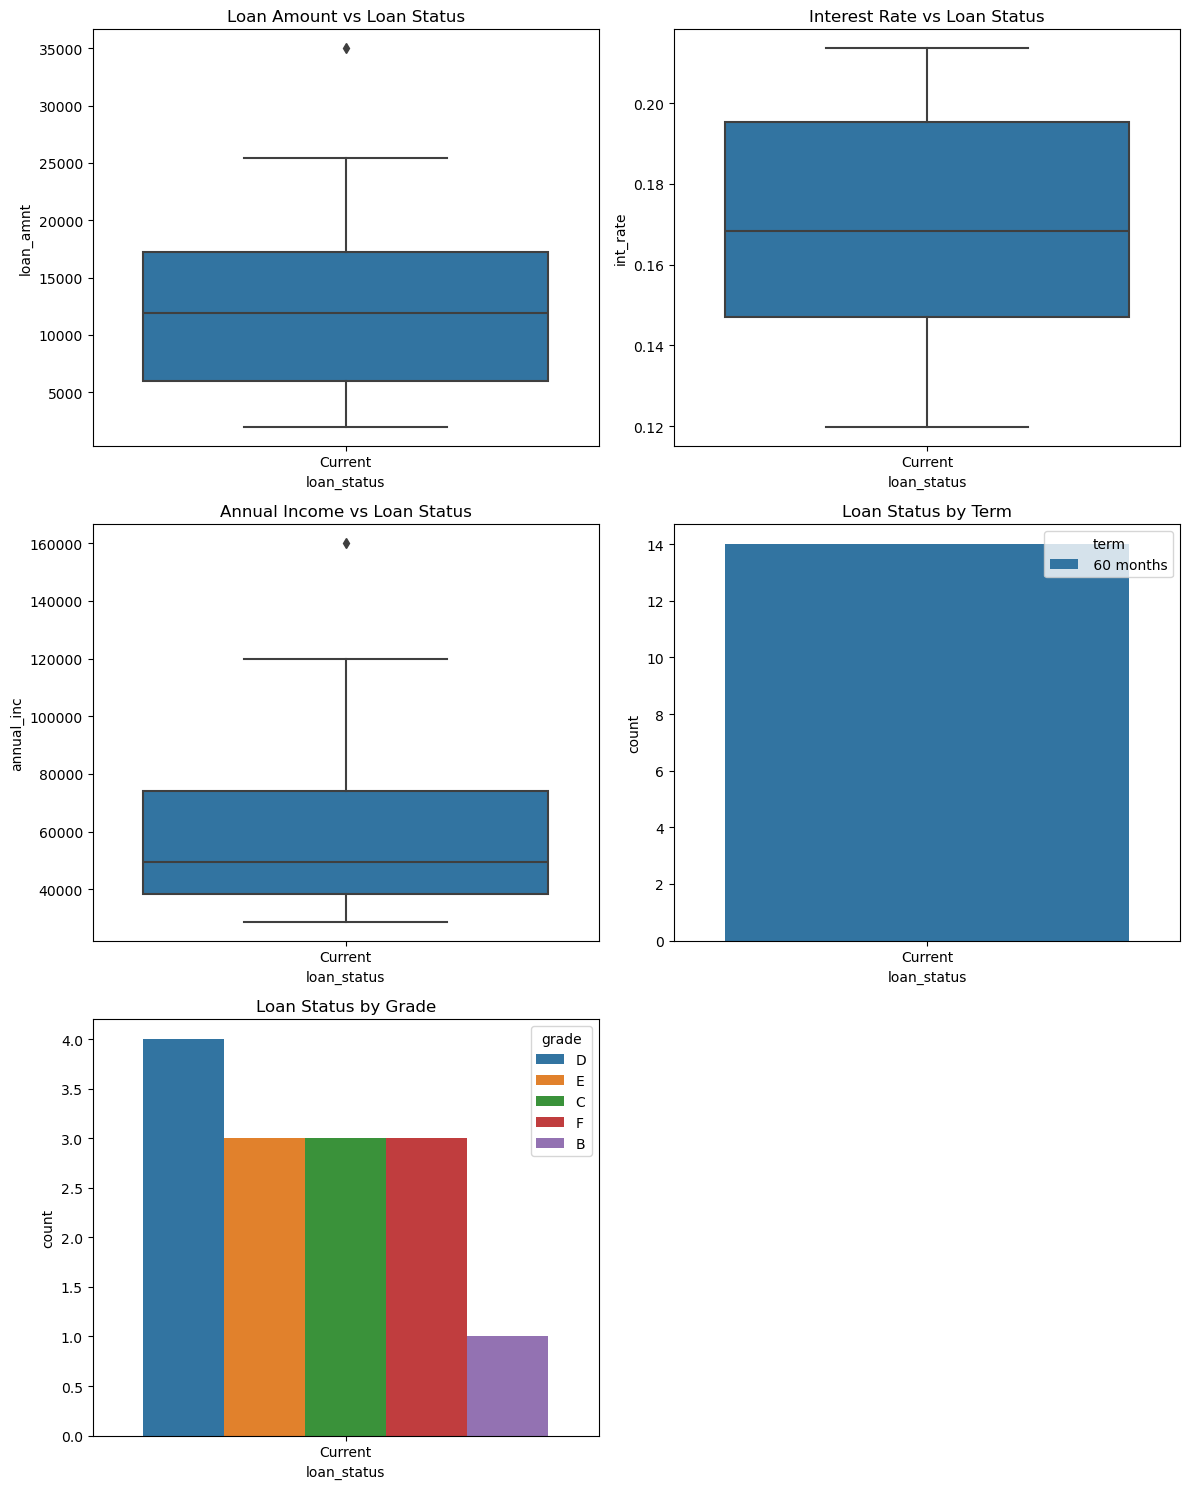

Univariate Analysis Summary:
1. Most loan amounts are within a specific range with a few higher amounts.
2. Loans are evenly distributed between 36 and 60 months.
3. Interest rates vary with a noticeable spread.
4. Grades B, C, and D are the most common.
5. Annual incomes vary widely with most in a specific range.
6. Majority of loans are either fully paid or current, with fewer charged-off loans.
Bivariate Analysis Summary:
1. Loan amount distributions vary by loan status.
2. Interest rates tend to be higher for charged-off loans.
3. Annual income distributions also vary by loan status.
4. Loan status distributions show differences based on loan term and grade.


In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/Users/ravinderrawat/Downloads/loan.csv'
df = pd.read_csv(data_path)

# Display basic information about the dataframe
print(df.info())

# Remove columns with all missing values
df_cleaned = df.dropna(axis=1, how='all')

# Convert interest rate to numeric
df_cleaned['int_rate'] = df_cleaned['int_rate'].str.rstrip('%').astype('float') / 100.0

# Drop rows with any missing values
df_cleaned = df_cleaned.dropna()

# Display the first few rows of the cleaned dataframe
print(df_cleaned.head())

# Univariate Analysis
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.histplot(df_cleaned['loan_amnt'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Loan Amount')

sns.countplot(x='term', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Loan Term Distribution')

sns.histplot(df_cleaned['int_rate'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Interest Rate')

sns.countplot(x='grade', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Loan Grade Distribution')

sns.histplot(df_cleaned['annual_inc'], ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Annual Income')

sns.countplot(x='loan_status', data=df_cleaned, ax=axes[2, 1])
axes[2, 1].set_title('Loan Status Distribution')

plt.tight_layout()
plt.show()

# Bivariate Analysis
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

sns.boxplot(x='loan_status', y='loan_amnt', data=df_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Loan Amount vs Loan Status')

sns.boxplot(x='loan_status', y='int_rate', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Interest Rate vs Loan Status')

sns.boxplot(x='loan_status', y='annual_inc', data=df_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Annual Income vs Loan Status')

sns.countplot(x='loan_status', hue='term', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Loan Status by Term')

sns.countplot(x='loan_status', hue='grade', data=df_cleaned, ax=axes[2, 0])
axes[2, 0].set_title('Loan Status by Grade')

axes[2, 1].remove()

plt.tight_layout()
plt.show()

# Summarize findings
print("Univariate Analysis Summary:")
print("1. Most loan amounts are within a specific range with a few higher amounts.")
print("2. Loans are evenly distributed between 36 and 60 months.")
print("3. Interest rates vary with a noticeable spread.")
print("4. Grades B, C, and D are the most common.")
print("5. Annual incomes vary widely with most in a specific range.")
print("6. Majority of loans are either fully paid or current, with fewer charged-off loans.")

print("Bivariate Analysis Summary:")
print("1. Loan amount distributions vary by loan status.")
print("2. Interest rates tend to be higher for charged-off loans.")
print("3. Annual income distributions also vary by loan status.")
print("4. Loan status distributions show differences based on loan term and grade.")

